In [1]:
import enerhabitat as eh
import pandas as pd 
import plotly.express as px


63.72855880820248 17.110473467033895


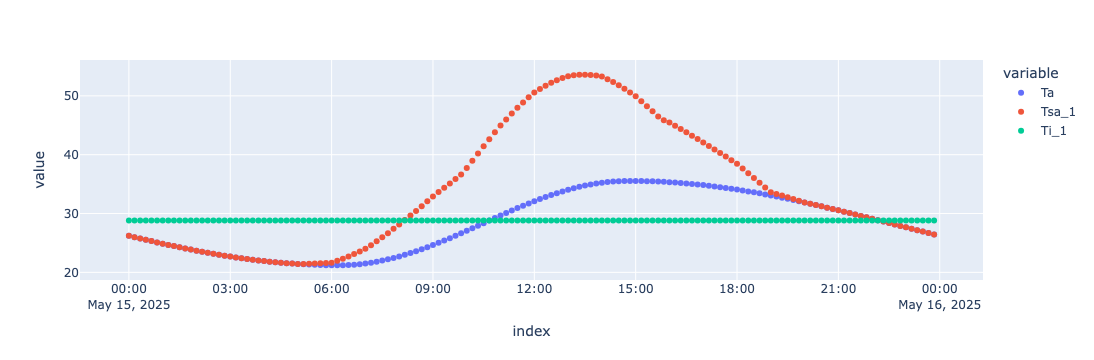

In [5]:
eh.Nx = 100
eh.dt = 600
eh.materials('./eh_config/materials.ini')
dia_promedio = eh.meanDay(epw_file="epw/Torreon.epw",month='05')
tsa_df = eh.Tsa(
    meanDay_dataframe=dia_promedio,
    solar_absortance=0.8,
    surface_tilt=90, 
    surface_azimuth=180,
    )

sc = [
    ("EPS", 0.1),
    # ("Acero", 0.1),
#    ("brick", 0.2),
#    ("concrete", 0.1),
]

sc_df, Qcool,Qheat = eh.solveCS(sc, tsa_df,AC=True)
resultado = tsa_df.join(sc_df, how="right")

solucion = pd.concat([resultado[['zenith', 'elevation', 'azimuth', 'equation_of_time', 'Tn', 'DeltaTn', 'Ta', 'Ig', 'Ib', 'Id']], resultado[["Is", "Tsa", "Ti"]].add_suffix("_1", axis=1)], axis=1)

print(Qcool/3600,Qheat/3600)

px.scatter(
    data_frame=solucion,
    x=solucion.index,
    y=["Ta","Tsa_1","Ti_1"]
)



600.9415700384563 103.59205246653298


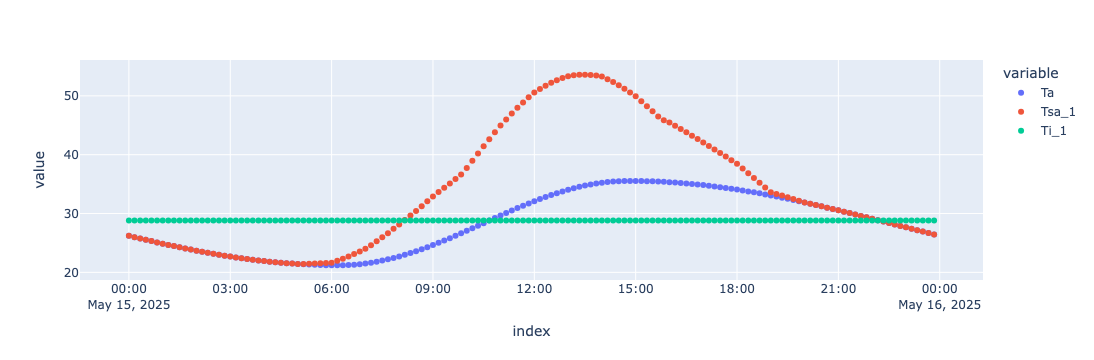

In [4]:
eh.Nx = 100
eh.dt = 600
eh.materials('./eh_config/materials.ini')
dia_promedio = eh.meanDay(epw_file="epw/Torreon.epw",month='05')
tsa_df = eh.Tsa(
    meanDay_dataframe=dia_promedio,
    solar_absortance=0.8,
    surface_tilt=90, 
    surface_azimuth=180,
    )

sc = [
    ("CAD", 0.1),
    # ("Acero", 0.1),
#    ("brick", 0.2),
#    ("concrete", 0.1),
]

sc_df, Qcool,Qheat = eh.solveCS(sc, tsa_df,AC=True)
resultado = tsa_df.join(sc_df, how="right")

solucion = pd.concat([resultado[['zenith', 'elevation', 'azimuth', 'equation_of_time', 'Tn', 'DeltaTn', 'Ta', 'Ig', 'Ib', 'Id']], resultado[["Is", "Tsa", "Ti"]].add_suffix("_1", axis=1)], axis=1)

print(Qcool/3600,Qheat/3600)

px.scatter(
    data_frame=solucion,
    x=solucion.index,
    y=["Ta","Tsa_1","Ti_1"]
)

